# Python notebook to reproduce _Supplementary Figure 4_

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_4/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
df = pd.read_csv('results/LINCS/processed_dataset_statistics.csv')

# Code to reproduce supplementary figure 4a,b

Supplementary Fig. 4a

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


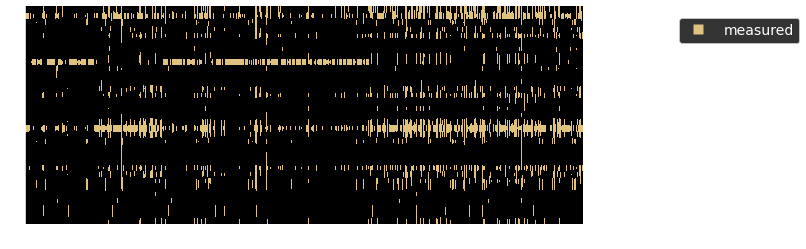

In [4]:
%matplotlib inline

cmap = mpl.colors.ListedColormap(['#000000', plot_settings.get_base_color()])
cl_map = {cl: i for i, cl in enumerate(np.unique(df['cell_id'].tolist()))}
dr_map = {dr: i for i, dr in enumerate(np.unique(df['drug_id'].tolist()))}
obs = np.zeros((len(cl_map), len(dr_map)))
for idx, row in df.iterrows():
    obs[cl_map[row['cell_id']], dr_map[row['drug_id']]] = 1
    
ax = plot_settings.get_wider_axis(double=True)
plot_utils.show_image(ax, obs, 'Drug', 'Cell line', aspect='auto', cmap=cmap)

lp = lambda i: plt.plot([],color=cmap(1), ms=10, 
                        mec="none", label='measured', ls="", 
                        marker="s")[0]
handles = [plt.plot([],color=cmap(1), ms=10, mec="none", label='measured', ls="", marker="s")[0]]
plot_utils.format_legend(ax, handles, ['measured'])
plot_utils.put_legend_outside_plot(ax, (1.4, 0.98))

plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_4a.pdf')

Supplementary Fig. 4b

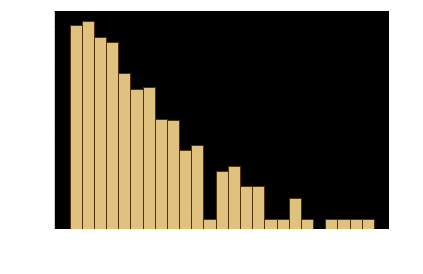

In [6]:
ax = plot_settings.get_wider_axis()
plot_utils.histogram(ax, df['num_points'], 'Number of measured (dose, time) tuples per treatment', 'Count', 
                     N_bins=25, yscale='log', color=plot_settings.get_base_color(), 
                     edge_color=plot_settings.get_model_colors('cvae'))
plot_utils.format_ax(ax)
plt.savefig(fig_dir + 'figure_4b.pdf')